## Klasifikasi pada Dataset Grape Quality

Klasifikasi dilakukan dengan menggunakan Logistic Regression, Random Forest dan K-Nearest Neighbour. Pemodelan dilakukan dengan membagi dataset ke dalam 80% subset pelatihan dan 20% subset pengujian. Evaluasi model dilakukan dengan menggunakan metrik akurasi, presisi, recall, dan f1-score.

In [11]:
#IMPORT LIB
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset
Dataset Grape Quality memuat 1000 pengamatan dengan 8 variabel bebas dan 1 variabel terikat. Variabel terikat pada dataset ini memiliki 4 kategori, yaitu High, Low, Medium dan Premium. 

In [13]:
#load dataset
df = pd.read_csv('GRAPE_QUALITY.csv')

In [15]:
#banyak data
df.shape

(1000, 13)

### Exploratory Data Analysis

In [17]:
#melihat 5 data teratas
df.head()

,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
0,1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,2023-09-04,8.4,55.9,223.3
1,2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,2023-09-16,8.8,36.9,312.1
2,3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,2023-08-25,11.1,64.9,698.7
3,4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,2023-09-13,8.0,54.5,660.1
4,5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,2023-08-11,11.2,36.3,410.4


In [19]:
#melihat 5 data terakhir
df.tail()

,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
995,996,Sauvignon Blanc,Napa Valley,3.14,High,23.14,4.01,182.63,23.46,2023-09-09,10.1,53.2,363.9
996,997,Cabernet Sauvignon,Sonoma,2.65,High,29.13,3.02,150.32,11.79,2023-08-19,9.0,56.7,325.7
997,998,Pinot Noir,Napa Valley,2.11,Medium,11.38,3.23,168.37,14.92,2023-08-28,10.6,66.5,473.2
998,999,Zinfandel,Loire Valley,2.28,Medium,11.14,3.21,208.98,22.24,2023-08-24,8.9,43.8,745.1
999,1000,Merlot,Napa Valley,1.96,Medium,15.64,4.02,98.41,18.96,2023-08-29,6.9,54.9,262.7


In [25]:
#mendeteksi jumlah data duplikat

df.duplicated().sum()

0

In [27]:
#mendeteksi jumlah nilai yang hilang pada dataset

df.isnull().sum()

sample_id                0
variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64

In [29]:
#mengetahui tipe data dari masing-masing variabel

df.dtypes

sample_id                  int64
variety                   object
region                    object
quality_score            float64
quality_category          object
sugar_content_brix       float64
acidity_ph               float64
cluster_weight_g         float64
berry_size_mm            float64
harvest_date              object
sun_exposure_hours       float64
soil_moisture_percent    float64
rainfall_mm              float64
dtype: object

In [33]:
#memisahkan data numerik dan kategorik

cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
num_cols = df.select_dtypes(include = np.number).columns.tolist()

print('Categorical Variables: ', cat_cols)
print('Numerical Variables: ', num_cols)

Categorical Variables:  ['variety', 'region', 'quality_category', 'harvest_date']
Numerical Variables:  ['sample_id', 'quality_score', 'sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']


In [37]:
#menampilkan nilai unik dari variabel variety
df['quality_category'].unique().tolist()

['Medium', 'High', 'Premium', 'Low']

In [39]:
#menampilkan jumlah data pada tiap kategori dari variabel Quality_category

df['quality_category'].value_counts()

quality_category
Medium     477
High       468
Premium     29
Low         26
Name: count, dtype: int64

In [41]:
#menampilkan statistik deskriptif dari dataset

df[num_cols].describe()

,sample_id,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,2.49436,20.140150,3.503410,197.112470,17.411620,8.992600,49.731900,489.42300
std,288.819436,0.52896,5.843944,0.406907,85.946831,4.302279,1.736462,11.591189,170.95025
min,1.000000,1.10000,10.060000,2.800000,50.200000,10.000000,6.000000,30.100000,200.10000
25%,250.750000,2.10000,14.817500,3.167500,122.572500,13.677500,7.500000,39.600000,341.60000
50%,500.500000,2.50000,20.375000,3.500000,195.285000,17.415000,8.900000,49.400000,490.40000
75%,750.250000,2.87000,25.212500,3.860000,271.265000,21.097500,10.400000,60.300000,628.65000
max,1000.000000,3.97000,29.990000,4.200000,349.870000,24.970000,12.000000,70.000000,799.30000



Variabel quality_score memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel sugar_content_brix memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel acidity_ph memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel cluster_weight_g memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel berry_size_mm memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel sun_exposure_hours memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel soil_moisture_percent memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

Variabel rainfall_mm memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

<Axes: >

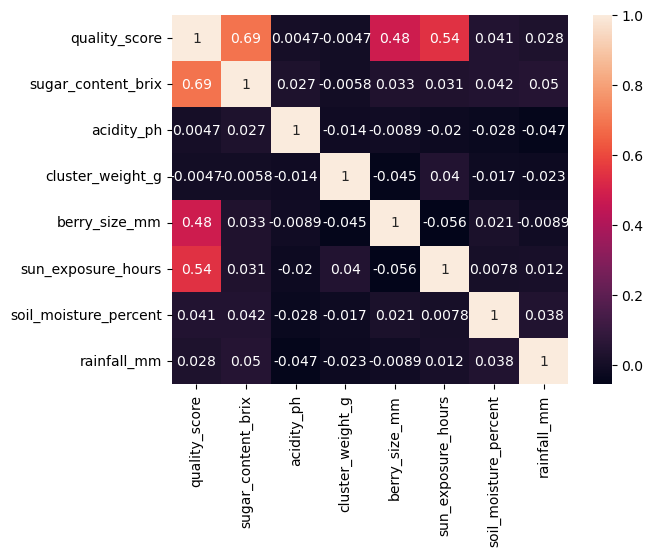

In [52]:
#menampilkan korelasi antar variabel
data_filtered = df[num_cols].drop(columns=['sample_id'])
sns.heatmap(data_filtered.corr(), annot = True)

1. variabel quality_score memiliki korelasi positif dengan variabel sugar_content_brix, acidity_ph berry_size_mm, sun_exposure_hours, soil_moisture_percent, rainfall_mm, namun korelasi negatif dengan variabel cluster_weight_g
2. variabel sugar_content_brix memiliki korelasi positif dengan variabel quality_score, acidity_ph berry_size_mm, sun_exposure_hours, soil_moisture_percent, rainfall_mm, namun korelasi negatif dengan variabel cluster_weight_g
3. variabel acidity_ph memiliki korelasi positif dengan variabel quality_score, sugar_content_brix, namun korelasi negatif dengan variabel cluster_weight_g berry_size_mm, sun_exposure_hours, soil_moisture_percent, rainfall_mm
4.  variabel cluster_weight_g memiliki korelasi negatif dengan variabel quality_score, sugar_content_brix, acidity_ph berry_size_mm, soil_moisture_percent, rainfall_mm, namun korelasi positif dengan variabel sun_exposure_hours
5.  variabel berry_size_mm memiliki korelasi positif dengan variabel quality_score, sugar_content_brix, soil_moisture_percent, rainfall_mm, namun korelasi negatif dengan variabel acidity_ph, cluster_weight_g, sun_exposure_hours
6.  variabel sun_exposure_hours memiliki korelasi positif dengan variabel quality_score, sugar_content_brix, acidity_ph berry_size_mm, soil_moisture_percent, rainfall_mm, namun korelasi negatif dengan variabel cluster_weight_g

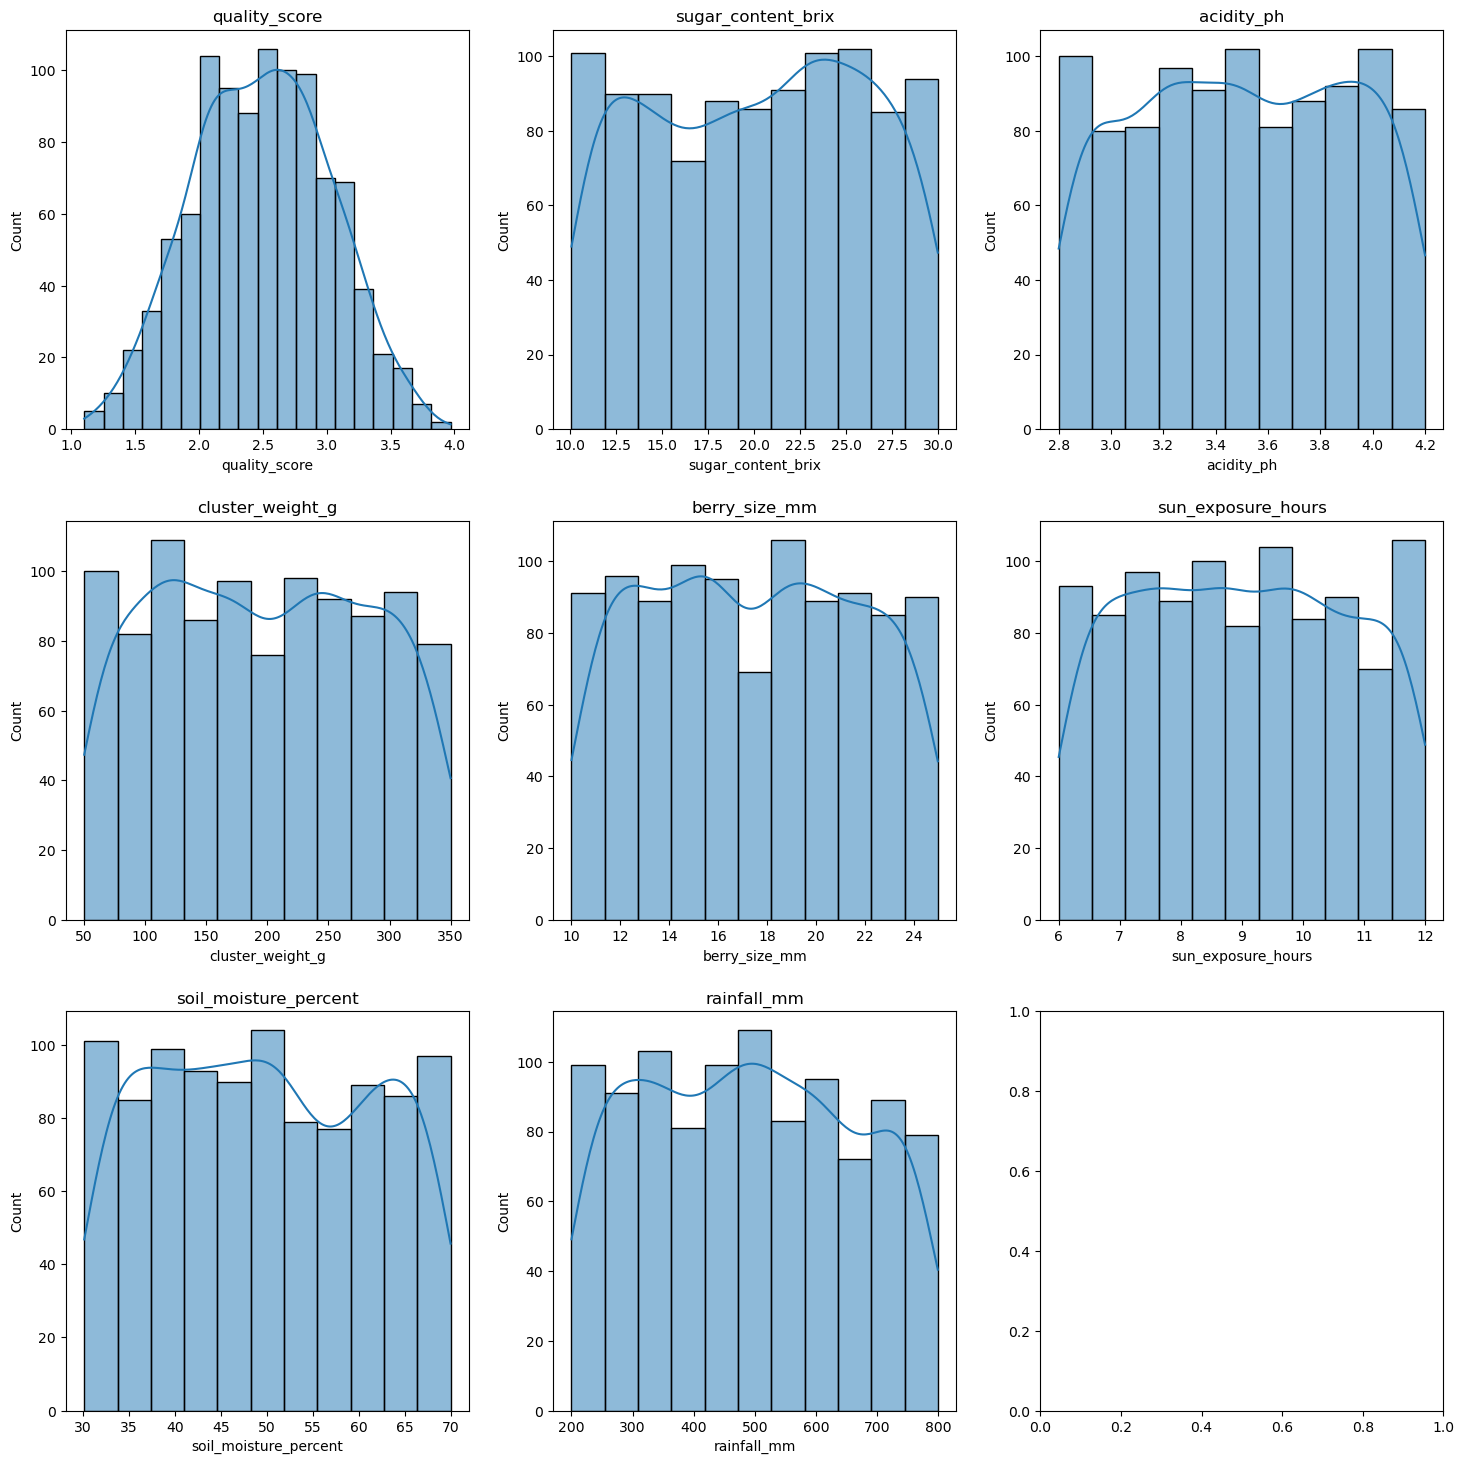

In [58]:
#menampilkan histogram dari dataset

data_filtered = df[num_cols].drop(columns=['sample_id'])

n_cols = len(data_filtered.columns)
n_rows = (n_cols + 2) // 3  # Calculate rows needed for a 3-column layout
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
for index, col in enumerate(data_filtered):
    ax = axes[index // 3, index % 3]  # Use the appropriate subplot
    sns.histplot(data_filtered[col], kde=True, ax=ax)
    ax.set_title(col)
fig.tight_layout(pad=2)

ValueError: num must be an integer with 1 <= num <= 6, not 7

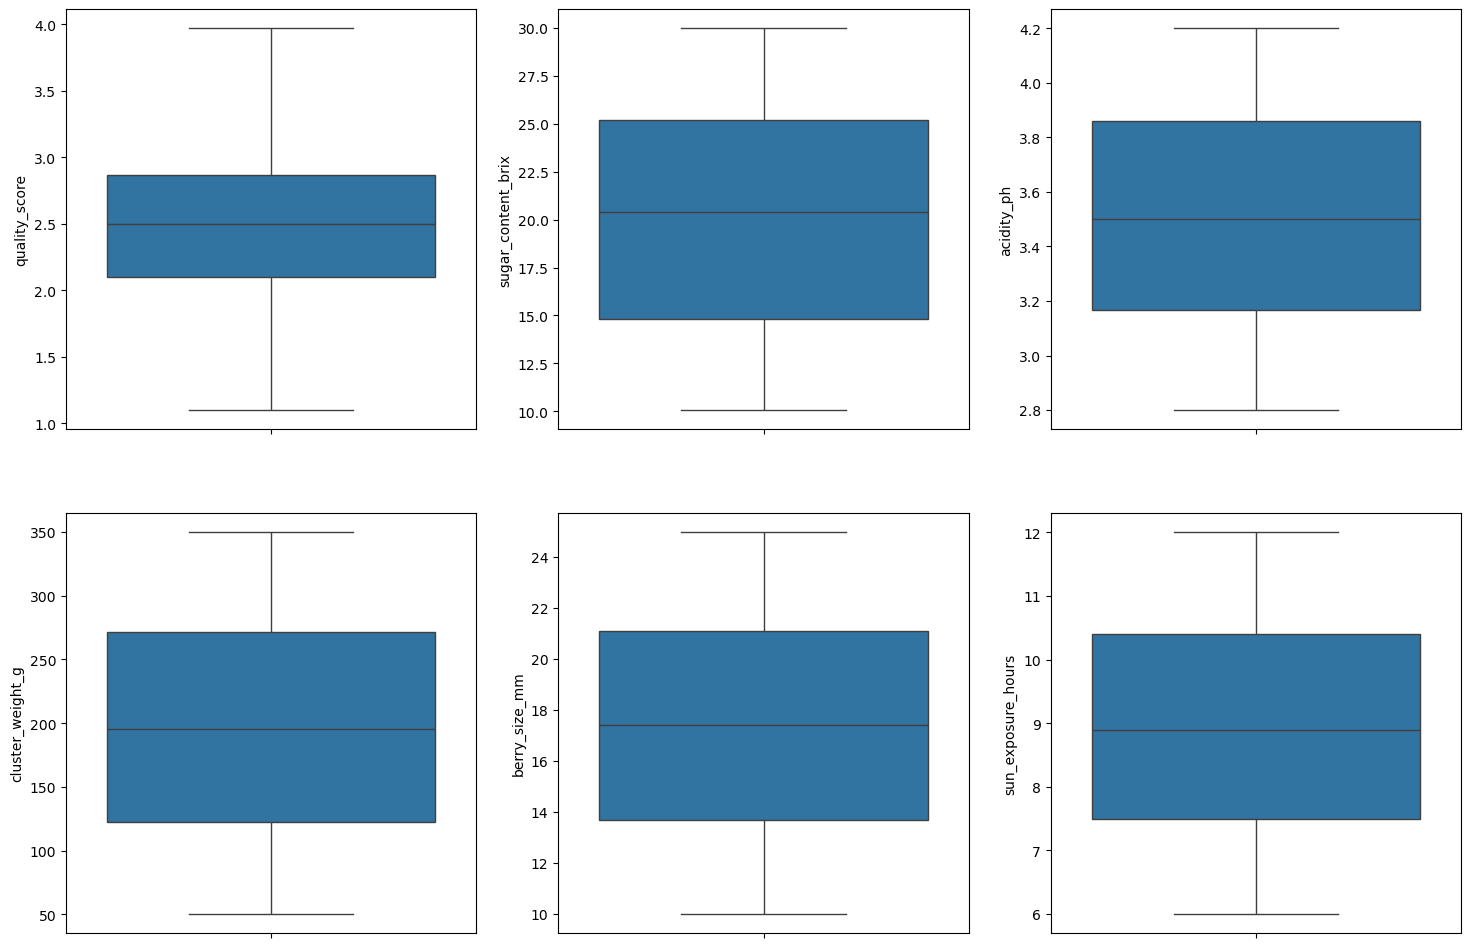

In [64]:
#menampilkan boxplot dari dataset

fig = plt.figure(figsize = (18, 12))
data_filtered = df[num_cols].drop(columns=['sample_id'])
for index, col in enumerate(data_filtered):
    plt.subplot(2, 3, index +1)
    sns.boxplot(y = col, data = df)
fig.tight_layout(pad = 2)

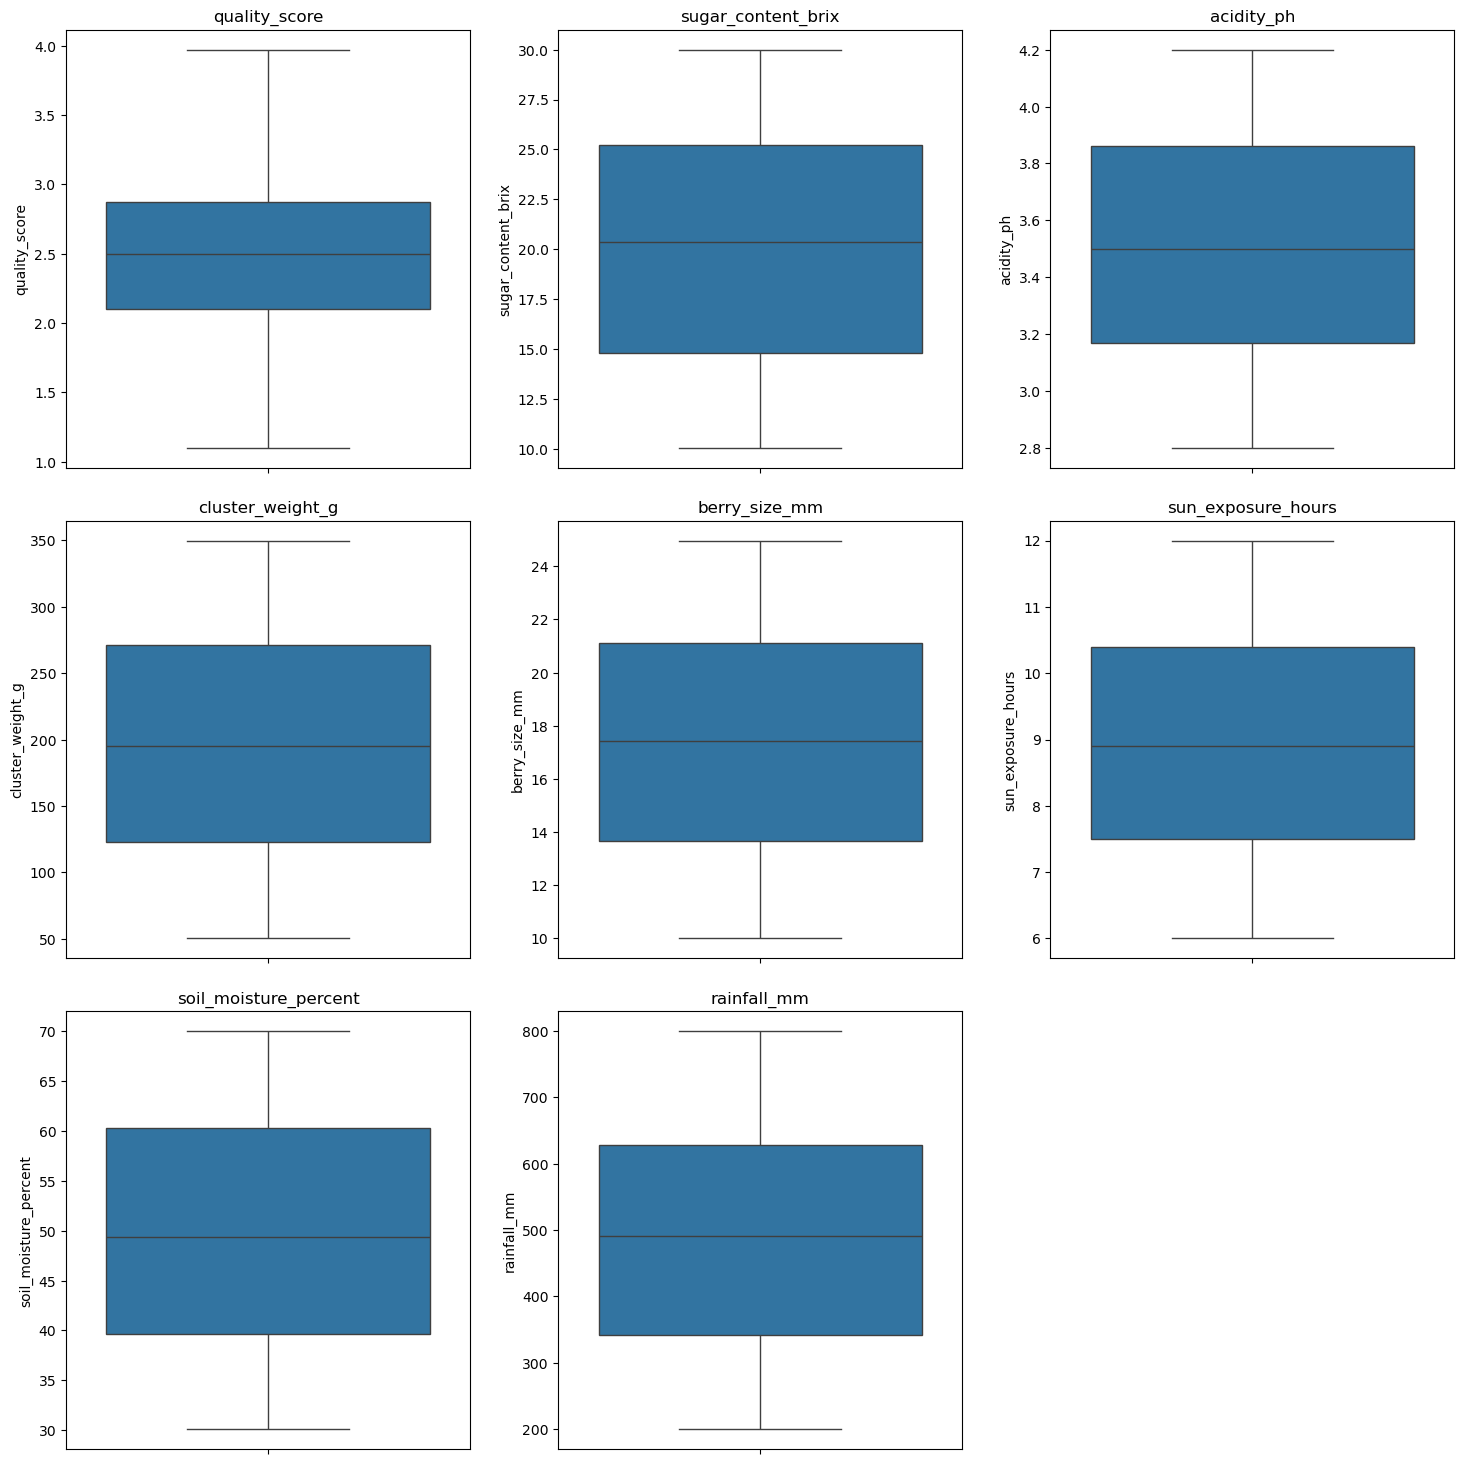

In [66]:
data_filtered = df[num_cols].drop(columns=['sample_id'])
n_cols = len(data_filtered.columns)

# Determine rows and columns dynamically
n_rows = (n_cols + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten axes to handle them uniformly
axes = axes.flatten()

# Plot each boxplot
for index, col in enumerate(data_filtered):
    sns.boxplot(y=col, data=df, ax=axes[index])
    axes[index].set_title(col)

# Hide unused subplots
for i in range(index + 1, len(axes)):
    axes[i].axis('off')

fig.tight_layout(pad=2)

1. variabel quality_score tidak memiliki outlier/pencilan
2. variabel sugar_content_brix tidak memiliki outlier/pencilan
3. variabel acidity_ph tidak memiliki outlier/pencilan
4.  variabel cluster_weight_g tidak memiliki outlier/pencilan
5.  variabel berry_size_mm tidak memiliki outlier/pencilan
6.  variabel sun_exposure_hourstidak memiliki outlier/pencilan

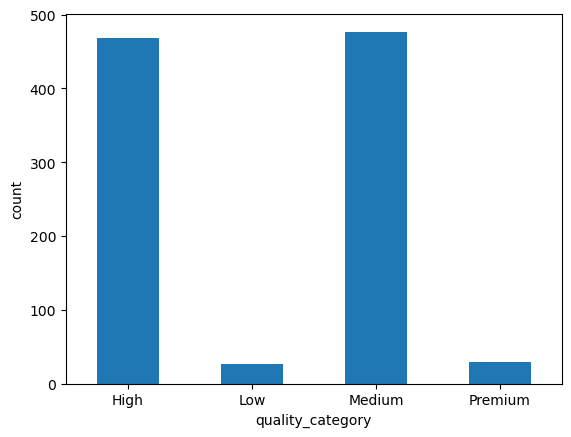

In [69]:
#menampilkan diagram batang dari variabel Species

df['quality_category'].value_counts().sort_index().plot(kind = 'bar', rot = 0, ylabel = 'count')
plt.show()


Jumlah pengamatan pada dataset ini tidak seimbang atau imbalance karena perbedaan jumlah pengamatan pada kategorHigh dan Mediumch jauh lebih tinggi daripada jumlah pengamatan pada kategorlow dan premiumsh sehingga perlu dilakukan resampling

## Data Splitting

In [91]:
#memisahkan data ke dalam variabel bebas (X) dan variabel terikat (y)

X=df[['quality_score','sugar_content_brix','acidity_ph','cluster_weight_g','berry_size_mm','sun_exposure_hours','soil_moisture_percent','rainfall_mm']]
Y=df['quality_category']

In [93]:
print(X.dtypes)

quality_score            float64
sugar_content_brix       float64
acidity_ph               float64
cluster_weight_g         float64
berry_size_mm            float64
sun_exposure_hours       float64
soil_moisture_percent    float64
rainfall_mm              float64
dtype: object


In [95]:
#mengatasi data imbalance dengan oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
y.value_counts()

quality_category
Medium     477
High       477
Premium    477
Low        477
Name: count, dtype: int64

In [99]:
#memisahkan data ke dalam subset pelatihan dan pengujian daengan perbandingan 80:20
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

### Normaslisasi Data

In [102]:
#normalisasi dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Pemodelan

In [111]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [105]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Prediksi

In [114]:
#Logistic Regression

lr_pred = lr_model.predict(X_test)
lr_pred

array(['Low', 'Medium', 'Premium', 'Medium', 'High', 'Premium', 'Low',
       'Premium', 'Low', 'High', 'Medium', 'Low', 'Premium', 'Premium',
       'Premium', 'Low', 'Medium', 'Premium', 'Low', 'Low', 'Low', 'High',
       'Premium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Premium', 'High', 'Medium', 'Premium', 'Low', 'Low',
       'Premium', 'Medium', 'Premium', 'High', 'High', 'High', 'Medium',
       'Premium', 'High', 'High', 'Medium', 'Low', 'Premium', 'Low',
       'Premium', 'High', 'Low', 'High', 'Premium', 'Premium', 'Low',
       'Medium', 'Medium', 'Premium', 'High', 'Medium', 'Premium', 'Low',
       'Low', 'Premium', 'Low', 'High', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Premium', 'High', 'Premium', 'Low', 'Premium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'High', 'High', 'High',
       'Medium', 'High', 'Premium', 'Medium', 'Premium', 'Low', 'Low',
       'Premium', 'Medium', 'High', 'High', 'Premium', 'Premium

In [116]:
#Random Forest

rf_pred = rf_model.predict(X_test)
rf_pred

array(['Low', 'Medium', 'Premium', 'Medium', 'High', 'Premium', 'Low',
       'Premium', 'Low', 'High', 'Medium', 'Low', 'Premium', 'Premium',
       'Premium', 'Low', 'Medium', 'Premium', 'Medium', 'Low', 'Low',
       'High', 'Premium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'Premium', 'Low',
       'Low', 'Premium', 'Medium', 'Premium', 'High', 'Medium', 'High',
       'Medium', 'Premium', 'High', 'High', 'Medium', 'Low', 'Premium',
       'Low', 'Premium', 'High', 'Medium', 'High', 'Premium', 'Premium',
       'Low', 'Medium', 'Medium', 'Premium', 'High', 'Medium', 'Premium',
       'Low', 'Low', 'Premium', 'Low', 'High', 'Low', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Premium', 'High', 'Premium', 'Low',
       'Premium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'High', 'High',
       'High', 'Medium', 'High', 'Premium', 'Medium', 'Premium', 'Low',
       'Low', 'Premium', 'Medium', 'High', 'High', 'Premium', 'Pr

In [118]:
#K-Nearest Neighbour

knn_pred = knn_model.predict(X_test)
knn_pred

array(['Low', 'Medium', 'Premium', 'Medium', 'High', 'Premium', 'Low',
       'Premium', 'Low', 'High', 'Medium', 'Low', 'Premium', 'Premium',
       'Premium', 'Low', 'Medium', 'Premium', 'Low', 'Low', 'Low', 'High',
       'Premium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Premium', 'High', 'High', 'Premium', 'Low', 'Low',
       'Premium', 'Medium', 'Premium', 'High', 'Medium', 'High', 'Medium',
       'Premium', 'High', 'Premium', 'Low', 'Low', 'Premium', 'Low',
       'Premium', 'High', 'Low', 'High', 'Premium', 'Premium', 'Low',
       'Medium', 'Medium', 'Premium', 'High', 'Medium', 'Premium', 'Low',
       'Low', 'Premium', 'Low', 'High', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Premium', 'High', 'Premium', 'Low', 'Premium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'High', 'High', 'Premium',
       'Medium', 'High', 'Premium', 'Medium', 'Premium', 'Low', 'Low',
       'Premium', 'High', 'High', 'Premium', 'Premium', 'Premiu

### Confusion Matrix

Text(0.5, 1.0, 'Linear Regression Confusion Matrix')

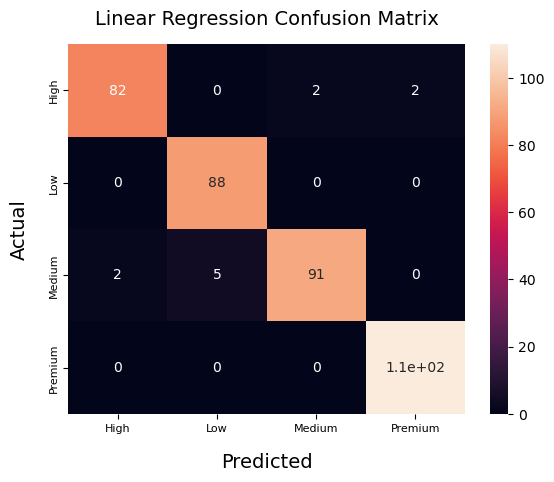

In [134]:
#Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report

lr_cm = confusion_matrix(y_test, lr_pred)
lr_hm = sns.heatmap(lr_cm, annot = True)
lr_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
lr_hm.xaxis.set_ticklabels(['High', 'Low', 'Medium', 'Premium'], fontsize = 8)
lr_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
lr_hm.yaxis.set_ticklabels(['High', 'Low', 'Medium', 'Premium'], fontsize = 8)
lr_hm.set_title("Linear Regression Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Linear Regression Confusion Matrix')

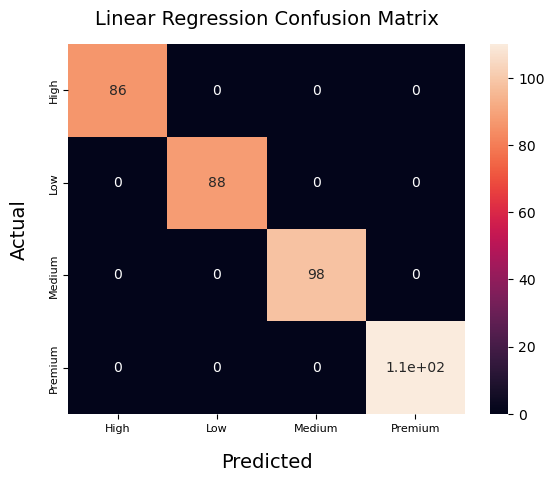

In [127]:
#Random Forest
lr_cm = confusion_matrix(y_test, rf_pred)
lr_hm = sns.heatmap(lr_cm, annot = True)
lr_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
lr_hm.xaxis.set_ticklabels(['High', 'Low', 'Medium', 'Premium'], fontsize = 8)
lr_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
lr_hm.yaxis.set_ticklabels(['High', 'Low', 'Medium', 'Premium'], fontsize = 8)
lr_hm.set_title("Linear Regression Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Linear Regression Confusion Matrix')

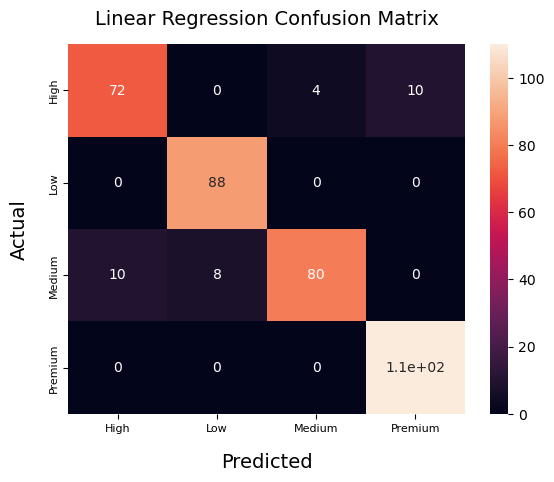

In [129]:
# KNN
lr_cm = confusion_matrix(y_test, knn_pred)
lr_hm = sns.heatmap(lr_cm, annot = True)
lr_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
lr_hm.xaxis.set_ticklabels(['High', 'Low', 'Medium', 'Premium'], fontsize = 8)
lr_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
lr_hm.yaxis.set_ticklabels(['High', 'Low', 'Medium', 'Premium'], fontsize = 8)
lr_hm.set_title("Linear Regression Confusion Matrix", fontsize = 14, pad = 14)

## Classification Reports

In [136]:
#Logistic Regression

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

        High       0.98      0.95      0.96        86
         Low       0.95      1.00      0.97        88
      Medium       0.98      0.93      0.95        98
     Premium       0.98      1.00      0.99       110

    accuracy                           0.97       382
   macro avg       0.97      0.97      0.97       382
weighted avg       0.97      0.97      0.97       382



### 1. Precision
    precision untuk kelas High adalah sebesar 0.98, artinya model dapat memprediksi 98% data pada kelas High dengan benar
    
    precision untuk kelas Low adalah sebesar 0.95, artinya model dapat memprediksi 95% data pada kelas Low dengan benar
    
    precision untuk kelas Medium adalah sebesar 0.98, artinya model dapat memprediksi 98% data pada kelas Medium dengan benar
    
    precision untuk kelas Premium adalah sebesar 0.98, artinya model dapat memprediksi 98% data pada kelas Premium dengan benar
    
    rata-rata precision adalah sebesar 0.97, artinya model dapat memprediksi rata-rata 97% data dengan benar
   
### 2. recall
    recall untuk kelas High adalah sebesar 0.95, artinya model dapat menghasilkan 95% prediksi yang tepat pada kelas High
    
    recall untuk kelas Low adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Low
    
    recall untuk kelas Medium adalah sebesar 0.93, artinya model dapat menghasilkan 93% prediksi yang tepat pada kelas Medium
    
    recall untuk kelas Premium adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Premium
   
### 3. f1-score
    f1-score untuk kelas High adalah sebesar 0.96, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas High adalah sebesar 96%
    
    f1-score untuk kelas Low adalah sebesar 0.97, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Low adalah sebesar 97%
    
    f1-score untuk kelas Medium adalah sebesar 0.95, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Medium adalah sebesar 95%
    
    f1-score untuk kelas Premium adalah sebesar 0.99, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Premium adalah sebesar 99%

### 4. accuracy
   model memiliki akurasi sebesar 0.97, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 97%

In [146]:
#Random Forest

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        86
         Low       1.00      1.00      1.00        88
      Medium       1.00      1.00      1.00        98
     Premium       1.00      1.00      1.00       110

    accuracy                           1.00       382
   macro avg       1.00      1.00      1.00       382
weighted avg       1.00      1.00      1.00       382



### 1. Precision
    precision untuk kelas High adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas High dengan benar
    
    precision untuk kelas Low adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Low dengan benar
    
    precision untuk kelas Medium adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Medium dengan benar
    
    precision untuk kelas Premium adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Premium dengan benar
    
    rata-rata precision adalah sebesar 1, artinya model dapat memprediksi rata-rata 100% data dengan benar
   
### 2. recall
    recall untuk kelas High adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas High
    
    recall untuk kelas Low adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Low
    
    recall untuk kelas Medium adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Medium
    
    recall untuk kelas Premium adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Premium
   
### 3. f1-score
    f1-score untuk kelas High adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas High adalah sebesar 100%
    
    f1-score untuk kelas Low adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Low adalah sebesar 100%
    
    f1-score untuk kelas Medium adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Medium adalah sebesar 100%
    
    f1-score untuk kelas Premium adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Premium adalah sebesar 100%

### 4. accuracy
   model memiliki akurasi sebesar 1, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 100%

In [150]:
#K-Nearest Neighbour

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

        High       0.88      0.84      0.86        86
         Low       0.92      1.00      0.96        88
      Medium       0.95      0.82      0.88        98
     Premium       0.92      1.00      0.96       110

    accuracy                           0.92       382
   macro avg       0.92      0.91      0.91       382
weighted avg       0.92      0.92      0.91       382



### 1. Precision
    precision untuk kelas High adalah sebesar 0.88, artinya model dapat memprediksi 88% data pada kelas High dengan benar
    
    precision untuk kelas Low adalah sebesar 0.92, artinya model dapat memprediksi 92% data pada kelas Low dengan benar
    
    precision untuk kelas Medium adalah sebesar 0.95, artinya model dapat memprediksi 98% data pada kelas Medium dengan benar
    
    precision untuk kelas Premium adalah sebesar 0.92, artinya model dapat memprediksi 92% data pada kelas Premium dengan benar
    
    rata-rata precision adalah sebesar 0.92, artinya model dapat memprediksi rata-rata 92% data dengan benar
   
### 2. recall
    recall untuk kelas High adalah sebesar 0.82, artinya model dapat menghasilkan 82% prediksi yang tepat pada kelas High
    
    recall untuk kelas Low adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Low
    
    recall untuk kelas Medium adalah sebesar 0.82, artinya model dapat menghasilkan 82% prediksi yang tepat pada kelas Medium
    
    recall untuk kelas Premium adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Premium
   
### 3. f1-score
    f1-score untuk kelas High adalah sebesar 0.86, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas High adalah sebesar 86%
    
    f1-score untuk kelas Low adalah sebesar 0.96, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Low adalah sebesar 96%
    
    f1-score untuk kelas Medium adalah sebesar 0.88, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Medium adalah sebesar 88%
    
    f1-score untuk kelas Premium adalah sebesar 0.96, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Premium adalah sebesar 96%

### 4. accuracy
   model memiliki akurasi sebesar 0.92, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 92%

# Terimakasih